<a href="https://colab.research.google.com/github/nidjosep/student-feedback-analysis/blob/master/Bag_Of_Words_Approach_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
import tensorflow as tf
from google.colab import drive


# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/reviews.csv')

Mounted at /content/drive


In [22]:

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/reviews.csv')
df.head()

Mounted at /content/drive


,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [23]:
def data_preprocessing_model_1(df):

    nltk.download('stopwords')

    def remove_stop_words(text):
      # Function to remove stop words

      stop_words = set(stopwords.words('english')) # Load stop words

      return ' '.join([word for word in text.split() if word.lower() not in stop_words])

    if 'Id' in df.columns:
      df.drop(columns=['Id'],inplace=True) #dropping the "Id" coloumn.

    if 'Review' in df.columns:

      df['Review'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True) #remove hashtags

      df['Review'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True) #Remove Mention

      df['Review'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True) #Remove URL

      df['Review']=df['Review'].str.lower() #all characters to lowercase

      df['Review'] = df['Review'].apply(remove_stop_words) # remove the stopwords


    return df

df = data_preprocessing_model_1(df)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Label
0,good interesting,5
1,"class helpful me. currently, i'm still learnin...",5
2,like!prof tas helpful discussion among student...,5
3,easy follow includes lot basic important techn...,5
4,really nice teacher!i could got point eazliy v,4


In [24]:
def bag_of_words(df,x_col_name,y_col_name=None,is_prediction=False,vectorizer_data = None):
  from sklearn.model_selection import train_test_split
  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.feature_extraction.text import TfidfVectorizer

  x = df[x_col_name]
  if(is_prediction == False):
     y = df[y_col_name]

  if is_prediction ==  True:
    vocabulary_data = vectorizer_data.transform(x)
    word_bag = pd.DataFrame(vocabulary_data.toarray(), columns = vectorizer_data.get_feature_names_out())

  else :

    # Creating a word corpus for vectorization
    corpus = []
    for i in range(x.shape[0]):
        corpus.append(x.iloc[i])


    vectorizer_data = CountVectorizer(max_features=5000)
    vocabulary_data = vectorizer_data.fit_transform(corpus)
    word_bag = pd.DataFrame(vocabulary_data.toarray(), columns = vectorizer_data.get_feature_names_out())
    if(is_prediction == False):
      word_bag['class_label']=df.Label

  return word_bag,vectorizer_data

word_bag,vectorizer_data= bag_of_words(df,"Review","Label",False)
word_bag.head()


,01,10,100,101,11,12,13,14,15,16,...,young,younger,your,yourself,youtube,zelikow,zero,zombies,zone,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [16]:
def train_test_model_1(df):
  from keras.utils import to_categorical

  word_bag_1 = df[df.class_label ==1]
  word_bag_2 = df[df.class_label ==2]
  word_bag_3 = df[df.class_label ==3]
  word_bag_4 = df[df.class_label ==4]
  word_bag_5 = df[df.class_label ==5]

  X_train_1 = word_bag_1.sample(frac=0.8, random_state=0)
  X_test_1 = word_bag_1.drop(X_train_1.index)

  X_train_2 = word_bag_2.sample(frac=0.8, random_state=0)
  X_test_2 = word_bag_2.drop(X_train_2.index)

  X_train_3 = word_bag_3.sample(frac=0.8, random_state=0)
  X_test_3 = word_bag_3.drop(X_train_3.index)

  X_train_4 = word_bag_4.sample(frac=0.8, random_state=0)
  X_test_4 = word_bag_4.drop(X_train_4.index)

  X_train_5 = word_bag_5.sample(frac=0.8, random_state=0)
  X_test_5 = word_bag_5.drop(X_train_5.index)

  X_train_df = pd.concat([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5], axis = 0)
  word_bag_train = X_train_df.drop(['class_label'], axis = 1)
  y_train = list(X_train_df.class_label)

  X_test_df = pd.concat([X_test_1, X_test_2, X_test_3, X_test_4, X_test_5], axis = 0)
  word_bag_test = X_test_df.drop(['class_label'], axis = 1)
  y_test = list(X_test_df.class_label)

  # Convert labels to one-hot encoded format
  y_train_encoded = to_categorical(y_train)
  y_test_encoded = to_categorical(y_test)
  word_bag_train, y_train = np.array(word_bag_train), np.array(y_train)
  word_bag_test, y_test = np.array(word_bag_test), np.array(y_test)

  return word_bag_train, y_train_encoded, word_bag_test, y_test_encoded

word_bag_train, y_train_encoded, word_bag_test, y_test_encoded = train_test_model_1(word_bag)



Epoch 1/10
2141/2141 [==============================] - 16s 5ms/step - loss: 0.2129 - accuracy: 0.7232 - val_loss: 0.0665 - val_accuracy: 0.9691
Epoch 2/10
2141/2141 [==============================] - 8s 4ms/step - loss: 0.1743 - accuracy: 0.7767 - val_loss: 0.0751 - val_accuracy: 0.9435
Epoch 3/10
2141/2141 [==============================] - 9s 4ms/step - loss: 0.1191 - accuracy: 0.8589 - val_loss: 0.1113 - val_accuracy: 0.8820
Epoch 4/10
2141/2141 [==============================] - 8s 4ms/step - loss: 0.0671 - accuracy: 0.9257 - val_loss: 0.1107 - val_accuracy: 0.8952
Epoch 5/10
2141/2141 [==============================] - 9s 4ms/step - loss: 0.0439 - accuracy: 0.9529 - val_loss: 0.1440 - val_accuracy: 0.8866
Epoch 6/10
2141/2141 [==============================] - 9s 4ms/step - loss: 0.0337 - accuracy: 0.9632 - val_loss: 0.1806 - val_accuracy: 0.8818
Epoch 7/10
2141/2141 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9678 - val_loss: 0.1987 - val_accuracy

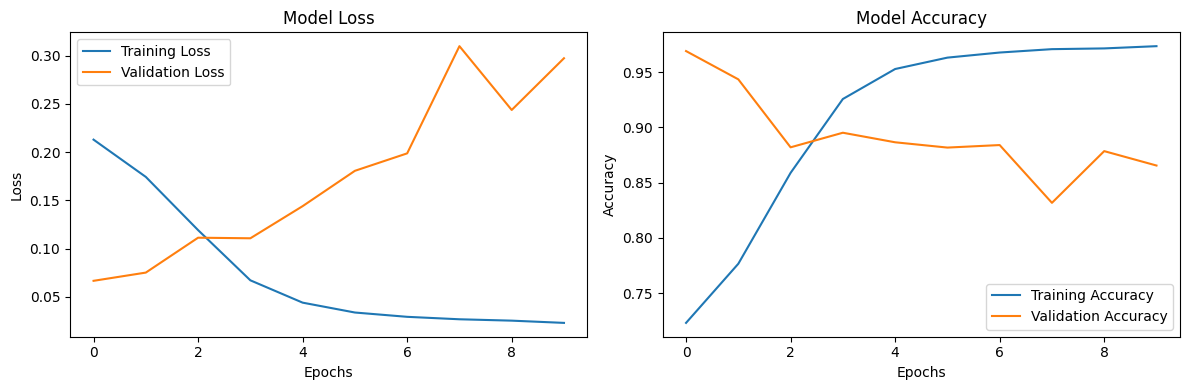

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(word_bag_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(word_bag_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
text = "worst class"

len_text = len(text)
word_count = len(text.split())# Creating a DataFrame
data = {
    'Text': [text]
}

df = pd.DataFrame(data)
df = data_preprocessing_model_1(df)



# Convert to DataFrame
bow_test,_= bag_of_words(df,'Text',None,True,vectorizer_data)

# Check if the shape matches the expected input shape for your model
print("Shape of the transformed test data:", bow_test.shape)

# If the shape is (1, 1000), you can predict using your model
if bow_test.shape[1] == 5000:
    predictions = model.predict(bow_test.values)
    print(predictions)
    predicted_classes = np.argmax(predictions, axis=1)
    print(predicted_classes)


Shape of the transformed test data: (1, 5000)
1/1 [==============================] - 0s 18ms/step
[[4.1380832e-19 9.9845421e-01 2.2696792e-03 1.5587035e-07 2.8692374e-12
  2.3376254e-09]]
[1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
